# Introducción a Python para Ciencia de Datos y Machine Learning

## 0. Instalación de Bibliotecas

```bash
# Para instalar todas las bibliotecas:
conda install numpy pandas matplotlib scipy scikit-learn tensorflow keras pytorch
```

## 1. Introducción a Python Básico
### 1.1 Variables y Tipos de Datos

In [ ]:
entero = 10
flotante = 3.14
cadena = "Hola Python"
booleano = True
lista = [1, 2, 3]
diccionario = {"nombre": "Juan", "edad": 25}
conjunto = {1, 2, 3}
tupla = (1, 2, 3)

print(f"Entero: {entero}, Tipo: {type(entero)}")
print(f"Flotante: {flotante}, Tipo: {type(flotante)}")
print(f"Cadena: {cadena}, Tipo: {type(cadena)}")
print(f"Booleano: {booleano}, Tipo: {type(booleano)}")
print(f"Lista: {lista}, Tipo: {type(lista)}")
print(f"Diccionario: {diccionario}, Tipo: {type(diccionario)}")
print(f"Conjunto: {conjunto}, Tipo: {type(conjunto)}")
print(f"Tupla: {tupla}, Tipo: {type(tupla)}")


### 1.2 Estructuras de Control

In [ ]:
# Condicionales
edad = 18
if edad >= 18:
    print("Mayor de edad")
else:
    print("Menor de edad")

In [ ]:
# Bucles
print("\nBucle for:")
for i in range(3):
    print(f"Iteración {i+1}")

In [ ]:
print("\nBucle while:")
contador = 0
while contador < 3:
    print(contador)
    contador += 1

### 1.3 Funciones

In [ ]:
def suma(a, b):
    """Suma dos números y devuelve el resultado"""
    return a + b

resultado = suma(5, 3)
print(f"5 + 3 = {resultado}")

### 1.4 Clases y Objetos

In [ ]:
class Perro:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def ladrar(self):
        print("¡Guau!")

    # def __str__(self):
    #     return f"Mi perro se llama {self.nombre} y tiene {self.edad} años"

mi_perro = Perro("Buddy", 3)
print(f"Mi perro se llama {mi_perro.nombre} y tiene {mi_perro.edad} años")
mi_perro.ladrar()

In [ ]:
print(mi_perro)

## 2. Principales Bibliotecas
### 2.1 NumPy (Cálculo Numérico)

In [12]:
import numpy as np

In [ ]:
# Crear arrays
arr = np.array([1, 2, 3, 4, 5])
print("Array original:", arr)


In [ ]:
# Operaciones matemáticas
print("\nArray + 2:", arr + 2)
print("Media:", np.mean(arr))

In [ ]:
# Matrices
matriz = np.array([[1, 2], [3, 4]])
print("\nMatriz:\n", matriz)
print("Determinante:", np.linalg.det(matriz))


### 2.2 Pandas (Análisis de Datos)


In [1]:
import pandas as pd

In [16]:
# Crear DataFrame
data = {
    'Nombre': ['Ana', 'Juan', 'Sofía', 'Daniel', 'Lucía', 'Pedro', 'María', 'Javier', 'Laura', 'Carlos'],
    'Edad': [25, 30, None, 22, 35, 40, None, 31, 27, 33],
    'Salario': [50000, 60000, 55000, None, 70000, 80000, 75000, None, 72000, 68000],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', None, 'Barcelona'],
}

df = pd.DataFrame(data)
df

,Nombre,Edad,Salario,Ciudad
0,Ana,25.0,50000.0,Madrid
1,Juan,30.0,60000.0,Barcelona
2,Sofía,NaN,55000.0,Valencia
3,Daniel,22.0,NaN,Sevilla
4,Lucía,35.0,70000.0,Madrid
5,Pedro,40.0,80000.0,Barcelona
6,María,NaN,75000.0,Valencia
7,Javier,31.0,NaN,Sevilla
8,Laura,27.0,72000.0,None
9,Carlos,33.0,68000.0,Barcelona


In [17]:
df.dtypes

Nombre      object
Edad       float64
Salario    float64
Ciudad      object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nombre   10 non-null     object 
 1   Edad     8 non-null      float64
 2   Salario  8 non-null      float64
 3   Ciudad   9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [19]:
# Operaciones básicas
print("\nDescripción estadística:\n", df.describe())


Descripción estadística:
             Edad      Salario
count   8.000000      8.00000
mean   30.375000  66250.00000
std     5.755432  10319.88372
min    22.000000  50000.00000
25%    26.500000  58750.00000
50%    30.500000  69000.00000
75%    33.500000  72750.00000
max    40.000000  80000.00000


In [20]:
df.isnull().sum()

Nombre     0
Edad       2
Salario    2
Ciudad     1
dtype: int64

Manejar datos faltantes

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [22]:
# Define columns by type
numeric_features = ['Edad', 'Salario']
categorical_features = ['Nombre', 'Ciudad']

In [23]:
df[categorical_features]

,Nombre,Ciudad
0,Ana,Madrid
1,Juan,Barcelona
2,Sofía,Valencia
3,Daniel,Sevilla
4,Lucía,Madrid
5,Pedro,Barcelona
6,María,Valencia
7,Javier,Sevilla
8,Laura,None
9,Carlos,Barcelona


In [24]:
# Create imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Combine with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_features),
        ('cat', categorical_imputer, categorical_features)
    ]
)

imputed_array = preprocessor.fit_transform(df)
df_imputed = pd.DataFrame(imputed_array, columns=numeric_features + categorical_features)

print("\nImputed DataFrame:")
print(df_imputed)


Imputed DataFrame:
   Edad  Salario  Nombre     Ciudad
0  25.0  50000.0     Ana     Madrid
1  30.0  60000.0    Juan  Barcelona
2  30.5  55000.0   Sofía   Valencia
3  22.0  69000.0  Daniel    Sevilla
4  35.0  70000.0   Lucía     Madrid
5  40.0  80000.0   Pedro  Barcelona
6  30.5  75000.0   María   Valencia
7  31.0  69000.0  Javier    Sevilla
8  27.0  72000.0   Laura       None
9  33.0  68000.0  Carlos  Barcelona


In [25]:
df[categorical_features] = df[categorical_features].replace(['', ' ', 'nan', 'None', None], np.nan)

In [26]:
df[categorical_features]

,Nombre,Ciudad
0,Ana,Madrid
1,Juan,Barcelona
2,Sofía,Valencia
3,Daniel,Sevilla
4,Lucía,Madrid
5,Pedro,Barcelona
6,María,Valencia
7,Javier,Sevilla
8,Laura,NaN
9,Carlos,Barcelona


In [27]:
df['Nombre'] = df['Nombre'].fillna(df['Nombre'].mode()[0])
df['Ciudad'] = df['Ciudad'].fillna(df['Ciudad'].mode()[0])
df['Edad'] = df['Edad'].fillna(df['Edad'].median())
df['Salario'] = df['Salario'].fillna(df['Salario'].median())
df

,Nombre,Edad,Salario,Ciudad
0,Ana,25.0,50000.0,Madrid
1,Juan,30.0,60000.0,Barcelona
2,Sofía,30.5,55000.0,Valencia
3,Daniel,22.0,69000.0,Sevilla
4,Lucía,35.0,70000.0,Madrid
5,Pedro,40.0,80000.0,Barcelona
6,María,30.5,75000.0,Valencia
7,Javier,31.0,69000.0,Sevilla
8,Laura,27.0,72000.0,Barcelona
9,Carlos,33.0,68000.0,Barcelona


Filtro de datos

In [30]:
df[df['Edad'] > 30]

,Nombre,Edad,Salario,Ciudad
2,Sofía,30.5,55000.0,Valencia
4,Lucía,35.0,70000.0,Madrid
5,Pedro,40.0,80000.0,Barcelona
6,María,30.5,75000.0,Valencia
7,Javier,31.0,69000.0,Sevilla
9,Carlos,33.0,68000.0,Barcelona


Manipular los datos - agregar nueva característica

In [31]:
# Obtener los valores de los percentiles
percentil_33 = df['Salario'].quantile(0.33)
percentil_66 = df['Salario'].quantile(0.66)

print(f"Percentil 33%: {percentil_33}")
print(f"Percentil 66%: {percentil_66}")

Percentil 33%: 67760.0
Percentil 66%: 69940.0


In [32]:
def categoria_salario(salario):
    if salario < percentil_33:
        return 'Bajo'
    elif salario < percentil_66:
        return 'Medio'
    else:
        return 'Alto'

df['Categoria_Salario'] = df['Salario'].apply(categoria_salario)
df

,Nombre,Edad,Salario,Ciudad,Categoria_Salario
0,Ana,25.0,50000.0,Madrid,Bajo
1,Juan,30.0,60000.0,Barcelona,Bajo
2,Sofía,30.5,55000.0,Valencia,Bajo
3,Daniel,22.0,69000.0,Sevilla,Medio
4,Lucía,35.0,70000.0,Madrid,Alto
5,Pedro,40.0,80000.0,Barcelona,Alto
6,María,30.5,75000.0,Valencia,Alto
7,Javier,31.0,69000.0,Sevilla,Medio
8,Laura,27.0,72000.0,Barcelona,Alto
9,Carlos,33.0,68000.0,Barcelona,Medio


In [ ]:
# Guardar datos en un csv
df.to_csv("data.csv", index=False)

In [ ]:
# Leer datos de un csv
df = pd.read_csv('data.csv')

print(df)

### 2.3 Matplotlib (Visualización)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Datos
x = np.linspace(0, 10, 100)
y = np.sin(x)

In [ ]:
# Gráfico
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='sin(x)', color='blue')
plt.title("Función Seno")
plt.xlabel("X")
plt.ylabel("sin(X)")
plt.legend()
plt.grid(True)
plt.show()


Exploración del dataframe de ejemplo

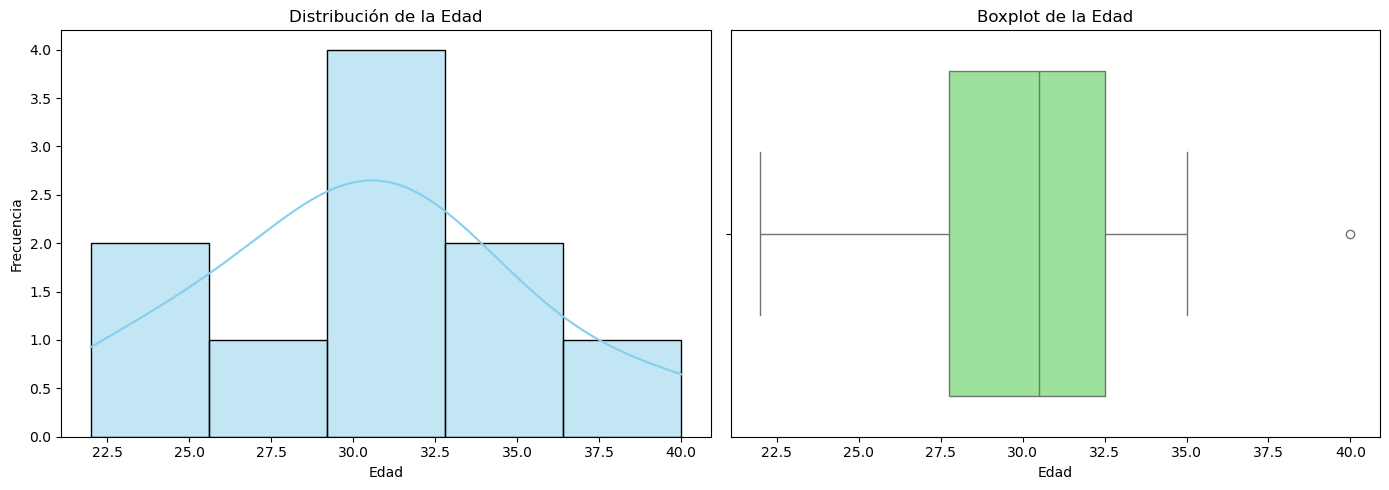

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
sns.histplot(df['Edad'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribución de la Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['Edad'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot de la Edad')

plt.tight_layout()
plt.show()

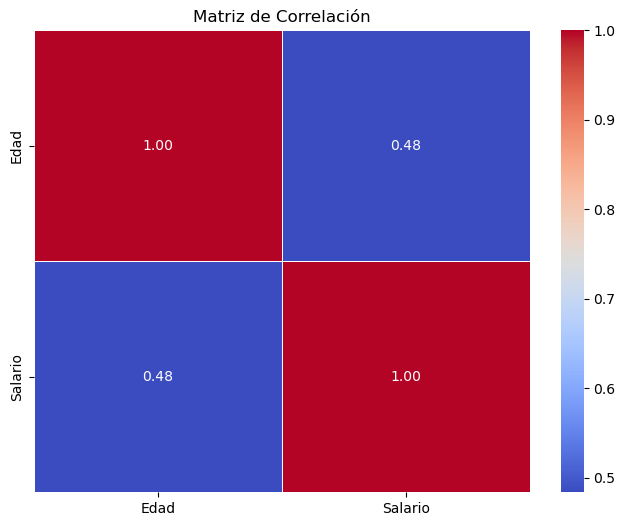

In [42]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

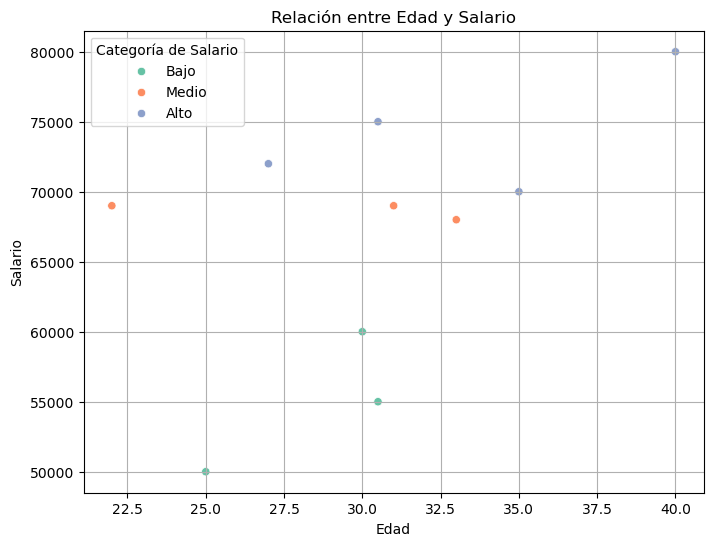

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Edad', y='Salario', hue='Categoria_Salario', palette='Set2')
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.grid(True)
plt.legend(title='Categoría de Salario')
plt.show()

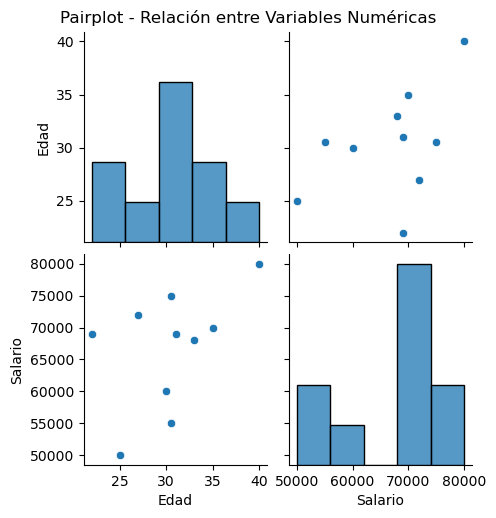

In [40]:
import seaborn as sns

# Pairplot básico
sns.pairplot(numeric_df)
plt.suptitle("Pairplot - Relación entre Variables Numéricas", y=1.02)
plt.show()

### 2.4 Scikit-learn (Machine Learning)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [ ]:
# Generar datos
X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [ ]:
# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

In [ ]:
# Predicción
plt.scatter(X, y, color='blue')
plt.plot(X, modelo.predict(X), color='red', linewidth=2)
plt.title("Regresión Lineal")
plt.show()

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


### 2.5 SciPy (Cálculo Científico)

In [ ]:
from scipy import stats

In [ ]:
# Estadísticas
datos = np.random.normal(5, 2, 1000)
print("Media:", np.mean(datos))
print("Desviación estándar:", np.std(datos))

In [ ]:
# Test t
grupo1 = np.random.normal(5, 1, 100)
grupo2 = np.random.normal(6, 1, 100)
t_stat, p_val = stats.ttest_ind(grupo1, grupo2)
print(f"\nValor p: {p_val:.4f}")

### Linear regression example

In [ ]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data with some noise
np.random.seed(42)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data + 1 + np.random.normal(0, 0.5, len(x_data))

In [ ]:
# Define the linear model function
def linear_model(x, m, b):
    return m * x + b


# Fit the model using scipy's curve_fit
popt, pcov = optimize.curve_fit(linear_model, x_data, y_data)
m_fit, b_fit = popt

In [ ]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, linear_model(x_data, m_fit, b_fit), 'r-',
         label=f'Fit: y = {m_fit:.2f}x + {b_fit:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using SciPy optimize.curve_fit')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: slope = {m_fit:.2f}, intercept = {b_fit:.2f}")

 ### 2.6 TensorFlow/Keras (Deep Learning)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Modelo simple
modelo = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Resumen del modelo:")
modelo.summary()

### Linear regression example

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos (similar a make_regression)
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1).astype(np.float32)
y = 2 * X + 1 + np.random.normal(0, 1, 100).reshape(-1, 1).astype(np.float32)

# Crear modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)  # Capa lineal
])

# Compilar
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

# Entrenar
historial = modelo.fit(X, y, epochs=100, verbose=0)

# Predicciones
y_pred = modelo.predict(X)




In [ ]:
# Visualización
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicción')
plt.title("Regresión Lineal con TensorFlow/Keras")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# Mostrar parámetros aprendidos
peso, sesgo = modelo.layers[0].get_weights()[0][0], modelo.layers[0].get_weights()[1]
print(f"\nParámetros aprendidos: y = {peso[0]:.2f}x + {sesgo[0]:.2f}")

### 2.7 PyTorch (Deep Learning)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Modelo básico
class RedSimple(nn.Module):
    def __init__(self):
        super().__init__()
        self.capa1 = nn.Linear(4, 10)
        self.capa2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.capa1(x))
        x = self.capa2(x)
        return x

In [ ]:
modelo = RedSimple()
print("Arquitectura del modelo:\n", modelo)

### Linear Regression example

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, 100).reshape(-1, 1)

# Convertir a tensores de PyTorch
X_tensor = torch.from_numpy(X.astype(np.float32))
y_tensor = torch.from_numpy(y.astype(np.float32))

# Definir modelo
class ModeloRegresion(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # Capa lineal

    def forward(self, x):
        return self.linear(x)

modelo = ModeloRegresion()

# Función de pérdida y optimizador
criterio = nn.MSELoss()
optimizador = torch.optim.SGD(modelo.parameters(), lr=0.01)

# Entrenamiento
epochs = 100
for epoch in range(epochs):
    # Forward pass
    y_pred = modelo(X_tensor)

    # Calcular pérdida
    perdida = criterio(y_pred, y_tensor)

    # Backward pass
    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch {epoch+1}, Pérdida: {perdida.item():.4f}')

# Predicciones
with torch.no_grad():
    y_pred_tensor = modelo(X_tensor)

# Visualización
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred_tensor.numpy(), color='red', linewidth=2, label='Predicción')
plt.title("Regresión Lineal con PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Parámetros aprendidos
peso = modelo.linear.weight.item()
sesgo = modelo.linear.bias.item()
print(f"\nParámetros aprendidos: y = {peso:.2f}x + {sesgo:.2f}")